# HealthKart Assignment


*First, I loaded the dataset using Pandas and explored a few rows to understand what kind of information is available.*

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("GrammarandProductReviews.csv")

# Show first 5 rows
df.head()


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [3]:
df.columns


Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')

# *I used the reviews.text column as the primary unstructured input and cleaned it to reduce noise before analysis.*

In [6]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df["clean_review"] = df["reviews.text"].apply(clean_text)

df[["reviews.text", "clean_review"]].head()


,reviews.text,clean_review
0,i love this album. it's very good. more to the...,i love this album its very good more to the hi...
1,Good flavor. This review was collected as part...,good flavor this review was collected as part ...
2,Good flavor.,good flavor
3,I read through the reviews on here before look...,i read through the reviews on here before look...
4,My husband bought this gel for us. The gel cau...,my husband bought this gel for us the gel caus...


# **Positive & Negative word lists**

In [7]:
positive_words = [
    "good", "great", "excellent", "amazing", "love",
    "nice", "best", "perfect", "happy", "satisfied"
]

negative_words = [
    "bad", "worst", "poor", "hate", "disappointed",
    "problem", "issue", "irritation", "damage", "waste"
]


In [8]:
def get_sentiment(text):
    pos_count = 0
    neg_count = 0

    for word in text.split():
        if word in positive_words:
            pos_count += 1
        if word in negative_words:
            neg_count += 1

    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_review"].apply(get_sentiment)

df[["clean_review", "sentiment"]].head()


,clean_review,sentiment
0,i love this album its very good more to the hi...,Positive
1,good flavor this review was collected as part ...,Positive
2,good flavor,Positive
3,i read through the reviews on here before look...,Negative
4,my husband bought this gel for us the gel caus...,Negative


# **Validate Using Ratings**


*I cross-checked sentiment output with user ratings to sanity-check the logic*

In [9]:
df[["reviews.rating", "sentiment"]].head(10)


,reviews.rating,sentiment
0,5,Positive
1,5,Positive
2,5,Positive
3,1,Negative
4,1,Negative
5,1,Neutral
6,1,Negative
7,1,Neutral
8,1,Negative
9,1,Neutral


# **Brand-Level Sentiment Analysis**





In [10]:
brand_sentiment = (
    df.groupby("brand")["sentiment"]
    .value_counts()
    .unstack()
    .fillna(0)
)

brand_sentiment.head()


sentiment,Negative,Neutral,Positive
brand,,,
4C Foods,0.0,2.0,4.0
AMBI,0.0,3.0,1.0
ANCHOR BAY,1.0,10.0,19.0
Adesso,0.0,1.0,1.0
Advantage,0.0,0.0,3.0


# **Simple Recommendation System**

*Recommend brands with more Positive than Negative reviews*

I built a rule-based recommendation system using sentiment distribution at the brand level

In [11]:
brand_sentiment["recommend"] = (
    brand_sentiment.get("Positive", 0) >
    brand_sentiment.get("Negative", 0)
)

brand_sentiment.sort_values("Positive", ascending=False).head(10)


sentiment,Negative,Neutral,Positive,recommend
brand,,,,
Clorox,69.0,3480.0,7151.0,True
Universal Home Video,37.0,2575.0,3566.0,True
Tide,285.0,1981.0,3118.0,True
FOX,164.0,1701.0,2633.0,True
Disney,21.0,1314.0,2357.0,True
Olay,111.0,1114.0,2195.0,True
Warner Home Video,107.0,1293.0,1930.0,True
L'Oreal Paris,76.0,972.0,1635.0,True
L'oreal Paris,43.0,709.0,1536.0,True


# **Goal**

# *Show: Are customers generally happy or unhappy?*

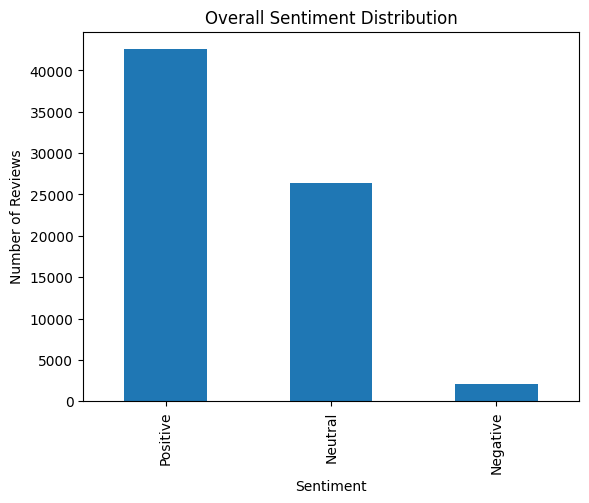

In [12]:
import matplotlib.pyplot as plt

sentiment_counts = df["sentiment"].value_counts()

plt.figure()
sentiment_counts.plot(kind="bar")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


# **Brand-wise Positive Reviews**








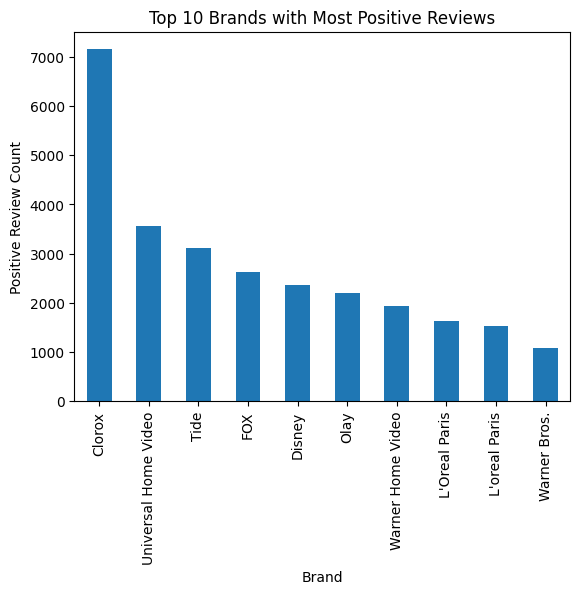

In [13]:
positive_by_brand = (
    df[df["sentiment"] == "Positive"]
    .groupby("brand")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
positive_by_brand.plot(kind="bar")
plt.title("Top 10 Brands with Most Positive Reviews")
plt.xlabel("Brand")
plt.ylabel("Positive Review Count")
plt.show()


# **Negative Reviews by Brand**

---



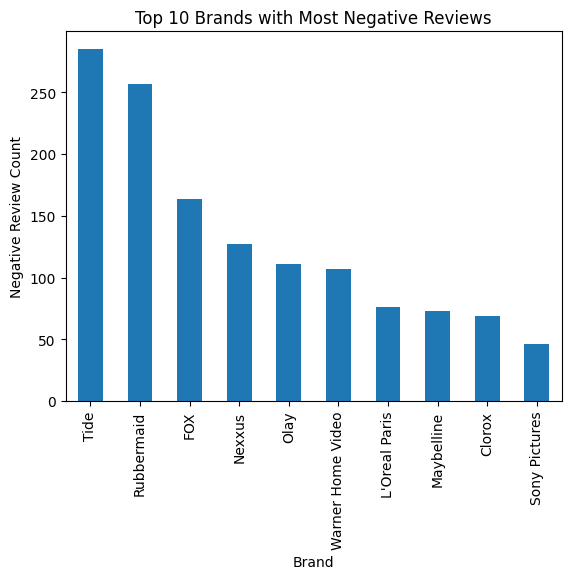

In [14]:
negative_by_brand = (
    df[df["sentiment"] == "Negative"]
    .groupby("brand")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
negative_by_brand.plot(kind="bar")
plt.title("Top 10 Brands with Most Negative Reviews")
plt.xlabel("Brand")
plt.ylabel("Negative Review Count")
plt.show()


# **Product Level Insights**

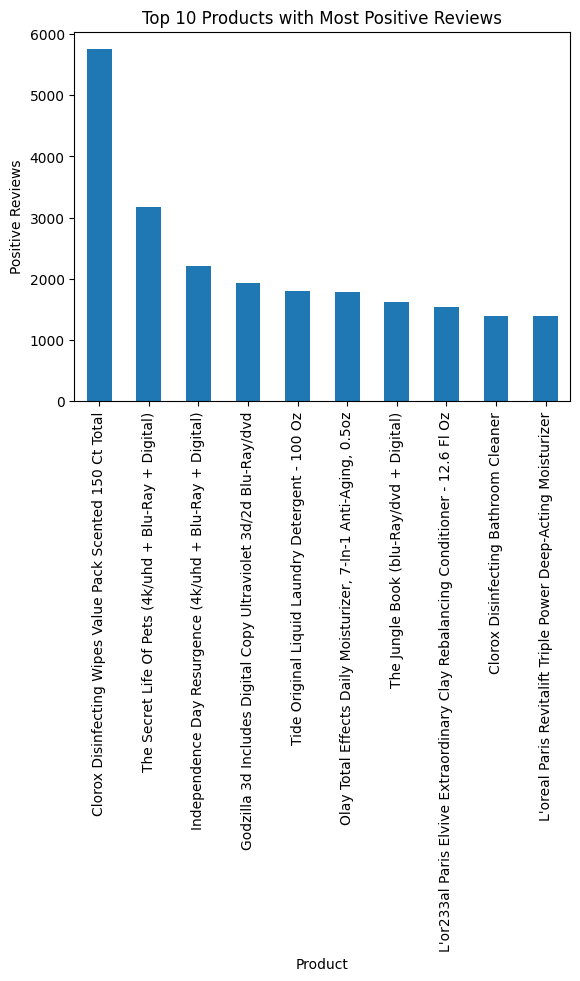

In [15]:
positive_products = (
    df[df["sentiment"] == "Positive"]
    .groupby("name")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
positive_products.plot(kind="bar")
plt.title("Top 10 Products with Most Positive Reviews")
plt.xlabel("Product")
plt.ylabel("Positive Reviews")
plt.show()
